<a href="https://colab.research.google.com/github/KarenLorelei/EstadisticaAplicada-KLCR-1945088/blob/main/Actividad5_KLCR_1945088_EAG43_mar2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística Aplicada
## Karen Lorelei Cerda Roiz 1945088
### Tarea 05 a marzo del 2023

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
datos = pd.read_excel('supervivencia_examenes.xlsx')

In [11]:
datos.head()

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f


### a) Estadísticas Descriptivas. Calcule el tiempo promedio que tardaron en responder los alumnos el examen y la calificación promedio obtenida. El profesor sospecha que las alumnas responden más rápido el examen, calcule el tiempo promedio que tardaron en responder las alumnas y su calificación promedio, asi como el tiempo promedio que tardaron en responder los alumnos y su calificación promedio. Elabore un print mostrando dichos resultados 

In [12]:
tp = datos['tiempo'].mean()
cp = datos['calificación'].mean()

print('El tiempo promedio que tardaron en responder todos los alumnos el examen es de', round(tp,2), 'minutos')
print('La calificación promedio obtenida de todos los alumnos es de', round(cp,2))

El tiempo promedio que tardaron en responder todos los alumnos el examen es de 107.35 minutos
La calificación promedio obtenida de todos los alumnos es de 90.71


In [13]:
dxg = pd.get_dummies(datos['género'])

In [14]:
datos['f'] = dxg['f']

In [67]:
datos = datos.drop(['género'], axis=1)

In [68]:
datos.head()

,id,tiempo,examen,calificación,f
0,1,85,1,100.0,0
1,2,109,1,100.0,0
2,3,118,1,100.0,0
3,4,120,1,100.0,1
4,5,106,1,98.0,1


In [16]:
df = datos.query("f==1")
dm = datos.query('f==0')

tpf = df['tiempo'].mean()
tpm = dm['tiempo'].mean()

cpf = df['calificación'].mean()
cpm = dm['calificación'].mean()

print('El tiempo promedio que tardaron en responder las alumnas el examen es de', round(tpf,2), 'minutos; y su calificación promedio obtenida es de', round(cpf,2))
print('El tiempo promedio que tardaron en responder los alumnos el examen es de', round(tpm,2), 'minutos; y su calificación promedio obtenida es de', round(cpm,2))


El tiempo promedio que tardaron en responder las alumnas el examen es de 108.12 minutos; y su calificación promedio obtenida es de 93.0
El tiempo promedio que tardaron en responder los alumnos el examen es de 106.67 minutos; y su calificación promedio obtenida es de 88.67


### b) ¿Cómo crees que se comporta el riesgo de entregar el examen conforme transcurre el tiempo? ¿es constante, creciente o decreciente? Según tu respuesta ajusta un modelo exponencial o weibull, primero para todos los individuos y muestra la función de riesgo.

Yo creo que el riesgo de entregar el examen es creciente, por que entre mas pasa el tiempo, mas personas terminan de contestar el examen y por ende lo entregan. Por lo que pienso que lo correcto es ajustar un modelo de Weibull; pero para comprobarlo, analizare el criterio de Akaike y vere cual es la mejor, para proceder a ajustar ese modelo.

In [18]:
from lifelines import ExponentialFitter

In [17]:
from lifelines import WeibullFitter

In [19]:
expt = ExponentialFitter().fit(datos['tiempo'],datos['examen'])

In [20]:
weibt = WeibullFitter().fit(datos['tiempo'],datos['examen'])

In [21]:
expt.AIC_.round(), weibt.AIC_.round()

(195.0, 130.0)

El mejor modelo es el Weibull, ya que es el que tiene menor criterio de Akaike.

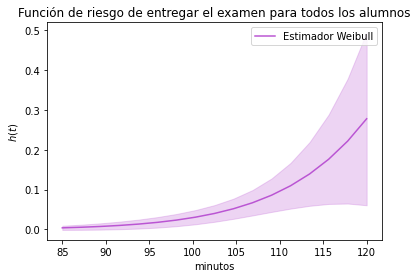

In [34]:
weibt.plot_hazard(label = 'Estimador Weibull', color = 'mediumorchid');
plt.title('Función de riesgo de entregar el examen para todos los alumnos')
plt.ylabel('$h(t)$')
plt.xlabel('minutos')
plt.show()

In [25]:
weibt.hazard_

,Weibull_estimate
85.0000,0.004025
87.1875,0.005499
89.3750,0.007454
91.5625,0.010031
93.7500,0.013405
95.9375,0.017795
98.1250,0.023471
100.3125,0.030769
102.5000,0.040101
104.6875,0.051973


### c) Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para hombres  y  mujeres,  y  grafica  ambas  funciones  de  supervivencia  juntas (empalmadas), ¿gráficamente quien tarda más en entregar el examen?

In [26]:
wf = WeibullFitter().fit(df['tiempo'],df['examen'])
wm = WeibullFitter().fit(dm['tiempo'],dm['examen'])

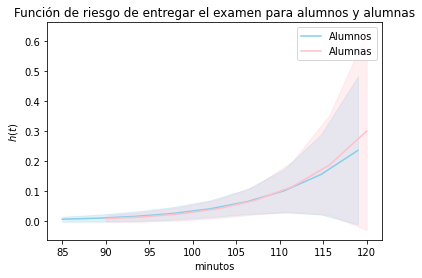

In [33]:
wm.plot_hazard(label = "Alumnos", color = 'SkyBlue');
wf.plot_hazard(label = "Alumnas", color = 'Pink');
plt.title('Función de riesgo de entregar el examen para alumnos y alumnas')
plt.ylabel('$h(t)$')
plt.xlabel('minutos')
plt.show()

Graficamente se puede apreciar que las alumnas tardan más en entregar el examen ya que su area (la rosa) empieza y termina un poco mas a la derecha que el area azul que es la de los alumnos.

### d) Estime  la  función  de  supervivencia del  tiempo  de  entrega del  examen  de todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función de supervivencia, los valores del intervalo de confianza al 95%, asi como la gráfica respectiva de la función de supervivencia con sus intervalos.

In [35]:
from lifelines import KaplanMeierFitter

In [36]:
kmt = KaplanMeierFitter().fit(datos['tiempo'], datos['examen'])

In [40]:
kmt.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


In [41]:
kmt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,17,17
85.0,1,1,0,0,17
87.0,1,1,0,0,16
90.0,1,1,0,0,15
99.0,1,1,0,0,14
103.0,1,1,0,0,13
106.0,1,1,0,0,12
108.0,2,2,0,0,11
109.0,1,1,0,0,9


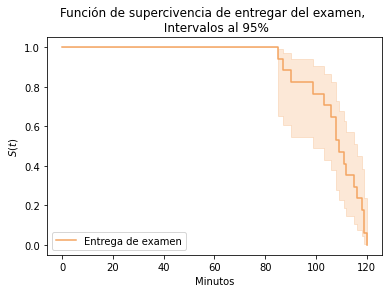

In [45]:
kmt.plot_survival_function(label = 'Entrega de examen', color = 'sandybrown')
plt.title('Función de supercivencia de entregar del examen, \n Intervalos al 95%')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.show()

### e) Realice  un  gráfico  donde  muestre  la  función  de  supervivencia de  Kaplan-Meier de los alumnos (m) y de las alumnas (f) con sus respectivos intervalos de confianza. Y comente con base en la gráfica si es posible que el profesor tenga razón respecto a que las alumnas responden más rápido el examen.

In [44]:
kmm = KaplanMeierFitter().fit(dm['tiempo'], dm['examen'])
kmf = KaplanMeierFitter().fit(df['tiempo'], df['examen'])

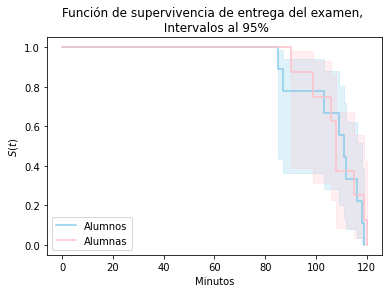

In [46]:
kmm.plot_survival_function(label = 'Alumnos', color = 'skyblue')
kmf.plot_survival_function(label = 'Alumnas', color = 'pink')
plt.title('Función de supervivencia de entrega del examen, \n Intervalos al 95%')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.show()

El  profesor no esta en lo correcto, ya que en la grafica anterior se puede observar que la funcion de supervivencia de las alumnas esta un poco mas a la derecha que la de los alumnos, lo cual significa que entregan su examen un poco despues.

### f) Realice  el  log  ranktest  para  probar  si  las  funciones  de  supervivencia  de alumnos  y  alumnas  para  responder  el  examen  son  iguales.  Comente  el resultado de la prueba de hipótesis y diga si el profesor tiene razón o no 

In [47]:
from lifelines.statistics import logrank_test

In [48]:
lrt = logrank_test(df['tiempo'],dm['tiempo'],
                       df['examen'],dm['examen'])

In [49]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

$H_0:$ El tiempo de entrega de examen de los alumnos y las alumnas es igual.

$H_a:$ El tiempo de entrega  de examen es distinto entre alumnos y alumnas.

Si p-value < $\alpha$, rechazamos $H_0$

$p$=0.69 > $\alpha$=0.05

Por lo tanto, con un 95% de confianza no rechazamos $H_0$, lo que significa que los hombres y las mujeres terminan el examen al mismo tiempo, o sea que su distribucion es igual.

### g) El profesor tambien sospecha que quienes entregan el examen más rápido es porque  no  estudiaron,  por  tanto no  saben  que  responder y entregan  el examen casi inmediatamente. Estime  un  modelo  de  cox de  riesgos  proporcionales  donde  utilice  como variables  explicativas  el  género  y  la  calificación  obtenida,  para  explicar  la función de riesgo de entregar el examen.

In [51]:
from lifelines import CoxPHFitter

In [71]:
cphf = CoxPHFitter().fit(datos,'tiempo','examen')
cphf.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-16 04:57:15 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
f             -0.50       0.60       0.80            -2.08             1.07                 0.13                 2.91

               cmp to     z    p   -log2(p)
covariate                                  
id               0.00  0.42 0.67       0.57
calificación     0.00  0.47 0.64       0.64
f                0.00 -0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

$H_0:$ Quienes entregan el examen mas rapido tienen menor calificacion, ya que no estudiaron y por ende no saben que responder y entregan el examen casi inmediatamente.

$H_a:$ Quienes entregan el examen mas rapido tienen mayor calificacion.

Si coef<0  ▶  1-exp(coef)

Si coef>0  ▶  exp(coef)-1

Si p-value < $\alpha$, rechazamos $H_0$

$p$=0.06 > $\alpha$=0.05

No rechazamos $H_0$


Por lo tanto, quienes se tardan mas en entregar el examen tienen la misma probabilidad de tener una alta calificacion que los que entregan el examen mas rapido.

### h) Interprete los coeficientes de género y calificación obtenidos por el modelo de cox, recuerde señalar: 1) si el coeficiente es significativo (se rechaza Ho), en caso de ser significativo señala si aumentan el riesgo de entregar el examen, y el tamaño del efecto. Recuerde añadir cph.plot() para ayudarse con la interpretación

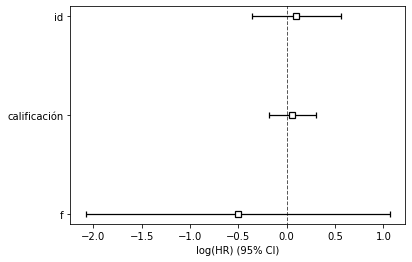

In [79]:
cphf.plot();

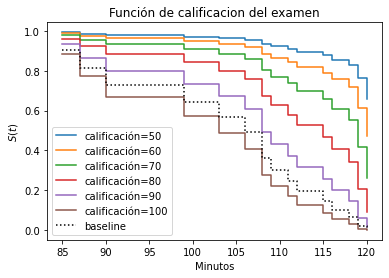

In [91]:
cphf.plot_partial_effects_on_outcome(covariates='calificación', values=[50,60,70,80, 90, 100]);
plt.title('Función de calificacion del examen')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.show()

#### Para la variable **Calificacion**

Si coef<0  ▶  1-exp(coef)

Si coef>0  ▶  exp(coef)-1

Si p-value < $\alpha$, rechazamos $H_0$

$p$=0.06 > $\alpha$=0.05

No rechazamos $H_0$

Por lo tanto, la calificacion no tiene relacion con si se entrega el examen o no.

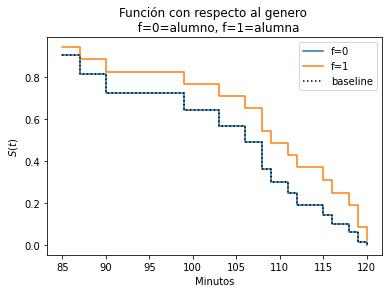

In [92]:
cphf.plot_partial_effects_on_outcome(covariates='f', values=[0,1]);
plt.title('Función con respecto al genero \n  f=0=alumno, f=1=alumna')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.show()

#### Para la variable **Genero**

Si coef<0  ▶  1-exp(coef)

Si coef>0  ▶  exp(coef)-1

Si p-value < $\alpha$, rechazamos $H_0$

$p$=-0.5 < $\alpha$=0.05

coef = -0.5 < 0

exp(coef) = 0.6

1-exp(coef) = 1-0.6 = 0.4

Rechazamos $H_0$

Por lo tanto, ser mujer disminuye el riesgo de entregar el examen en un 4%.

### i) Utilice cph.plot_partial_effects_on_outcome(covariates='variable', values=[0,1]) para estimar las funciones de supervivencia de alumnos y alumnas de acuerdo con el modelo de cox ¿obtiene resultados similares al inciso c, es decir, coincide con las funciones de supervivencia de KaplanMeier?

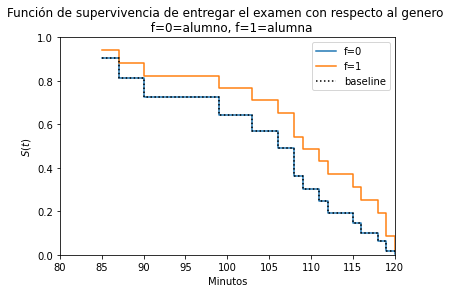

In [99]:
cphf.plot_partial_effects_on_outcome(covariates='f', values=[0,1]);
plt.title('Función de supervivencia de entregar el examen con respecto al genero \n  f=0=alumno, f=1=alumna')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.xlim (80 , 120)
plt.ylim (0 , 1)
plt.show()

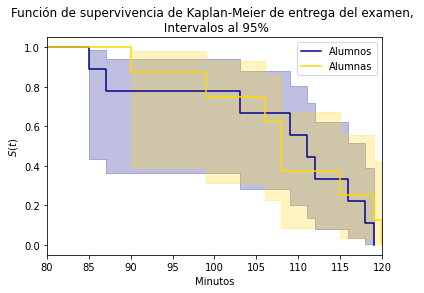

In [97]:
kmm.plot_survival_function(label = 'Alumnos', color = 'darkblue')
kmf.plot_survival_function(label = 'Alumnas', color = 'gold')
plt.title('Función de supervivencia de Kaplan-Meier de entrega del examen, \n Intervalos al 95%')
plt.ylabel('$S(t)$')
plt.xlabel('Minutos')
plt.xlim (80 , 120)
plt.show()

Las dos graficas se parecen muchisimo, aunque cabe recalcar que si hay algunas diferencias, aunque no tan abismales como para decir que no coinciden.

### j) Por último, con base en la interpretación del modelo de cox y la significancia de los coeficientes, comente si el profesor tiene razón al señalar que las alumnas responden en menor tiempo el examen, y si el profesor tambien tiene razón al señalar que los que entregan el examen rápido no estudiaron y por tanto obtienen menores calificación

El profesor se ha equivocado en los dos asuntos, ya que pudimos notar que las mujeres son un poco mas lentas a la hora de entregar el examen, y que el tiempo en entregar el examen no significa nada en cuanto a la calificacion obtenida.